<a href="https://www.kaggle.com/code/alihassanshahid/car-price-prediction?scriptVersionId=219109417" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color:#3a8eae; border: 2px solid #007acc; border-radius:10px; padding:20px;">
    <h2 style="color:#ffffff; font-family: Arial, sans-serif;">🚗 Car Price Prediction</h2>
    <p style="color:#e0e0e0; font-size:16px;">
        This notebook aims to predict the prices of used cars based on various features like mileage, engine size, brand, and year. 
        We will use machine learning models like <strong style="color:#ff6f61;">Linear Regression</strong>, <strong style="color:#6fa3ef;">Decision Trees</strong>, 
        and <strong style="color:#6fe69e;">Gradient Boosting</strong> to achieve this.
    </p>
    <ul style="color:#ffffff; font-size:15px; list-style-type: disc; margin-left: 20px;">
        <li style="color:#ff6f61;">🔍 Data Cleaning & Preprocessing</li>
        <li style="color:#6fa3ef;">📊 Model Training & Evaluation</li>
        <li style="color:#6fe69e;">📈 Model Comparison</li>
    </ul>
</div>


## Metadata Information 🗂️

| Feature              | Description |
|----------------------|-------------|
| Make/Model           | The brand or model of the car |
| Year                 | The year the car was manufactured |
| Engine Size (L)      | Size of the car's engine in liters |
| Fuel Type            | Type of fuel used (e.g., Petrol, Diesel, etc.) |
| Transmission         | Type of transmission (e.g., Automatic, Manual) |
| Mileage (km)         | Distance covered by the car in kilometers |
| Price                | Target variable representing the price of the car |

---



| Model | Model | Model |
|-------|-------|-------|
| 🏎️ **RandomForest** | 🏎️ **AdaBoost** | 🏎️ **GradientBoosting** |
| 🏎️ **KNeighbors** | 🏎️ **SVR** | 🏎️ **DecisionTree** |
| 🏎️ **XGBoost** | 🏎️ **CatBoost** | 🏎️ **LGBM** |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")

In [3]:
df = df.drop(['ID'], axis = 1)

In [4]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

# 🔧 **Data Cleaning**
This section outlines the steps taken to clean the dataset for used car price prediction. We will handle data type conversions, outlier removal, and missing values.


In [6]:
# Convert 'Mileage' column to string and replace ' km' with an empty string, then convert back to numeric
df['Mileage'] = pd.to_numeric(df['Mileage'].astype(str).str.replace(' km', ''), errors='coerce')

# Convert 'Engine volume' and 'Price' columns to numeric with coercion for non-numeric values
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = ['Price', 'Mileage', 'Engine volume']

for column in numeric_columns:
    df = remove_outliers(df, column)

print(df.describe())

              Price    Prod. year  Engine volume        Mileage     Cylinders  \
count  14976.000000  14976.000000   14976.000000   14976.000000  14976.000000   
mean   13657.441506   2010.924613       2.158794  130187.483240      4.380409   
std    11215.622371      5.519187       0.629238   79745.416991      0.869664   
min        1.000000   1939.000000       0.500000       0.000000      1.000000   
25%     4391.000000   2010.000000       1.600000   71241.500000      4.000000   
50%    11917.000000   2012.000000       2.000000  124184.000000      4.000000   
75%    19707.000000   2014.000000       2.500000  179746.000000      4.000000   
max    47120.000000   2020.000000       3.700000  364523.000000     16.000000   

            Airbags  
count  14976.000000  
mean       6.570045  
std        4.276882  
min        0.000000  
25%        4.000000  
50%        5.000000  
75%       12.000000  
max       16.000000  


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


# 🛠️ **Models**
In this section, we will explore the various machine learning models used to predict car prices. Each model offers unique strengths and will be evaluated for performance.

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying categorical and numerical columns
categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes(exclude='object').drop('Price', axis=1).columns

# Define preprocessing for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ]
)

# Define different models
models = {
    'GradientBoosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, random_state=50),
    'SVR': SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=.1),
    'DecisionTree': DecisionTreeRegressor(random_state=50),
    'XGBoost': XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=50),
    'CatBoost': CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, loss_function='RMSE', random_seed=50, verbose=False),
    'LGBM': LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=50)
}

# Splitting the data into training and testing sets
drop_columns = ['Price']
X = df.drop(columns=[col for col in drop_columns if col in df.columns])
# X = df.drop(['Price','ID','Levy','Leather interior','Gear box type','Doors'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [8]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Store model results
model_performance = []

# Train and evaluate each model
for name, model in models.items():
    # Define the pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Save results
    model_performance.append({
        'Model': name,
        'R2 Score': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Predictions': y_pred  # Save predictions for later visualization
    })

# Convert results to DataFrame for easy comparison
performance_df = pd.DataFrame(model_performance)

# Display performance of all models
print("\nModel Performance Comparison:")
print(performance_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 11980, number of used features: 250
[LightGBM] [Info] Start training from score 13670.071369

Model Performance Comparison:
              Model  R2 Score  Mean Absolute Error  Mean Squared Error  \
0  GradientBoosting  0.661300          4676.598285        4.134577e+07   
1               SVR  0.628852          4352.321421        4.530670e+07   
2      DecisionTree  0.660734          3594.127893        4.141479e+07   
3           XGBoost  0.750688          3742.666206        3.043394e+07   
4          CatBoost  0.744143          3896.735306        3.123292e+07   
5              LGBM  0.782268          3345.603503        2.657893e+07   

                                        

# 📊 **Visualizations**
This section presents various visualizations to help analyze the used car prices.

In [9]:
import plotly.graph_objects as go
labels = ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'Hatchback', 'Jeep']
source = [0, 1, 2, 3, 4, 4, 0]  # Manufacturer to category
target = [4, 4, 5, 4, 5, 5, 5]
value = [1, 1, 1, 1, 1, 1, 1]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,
        color='blue'
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Sankey Diagram of Manufacturer to Category Relationships", font_size=10)
fig.show()


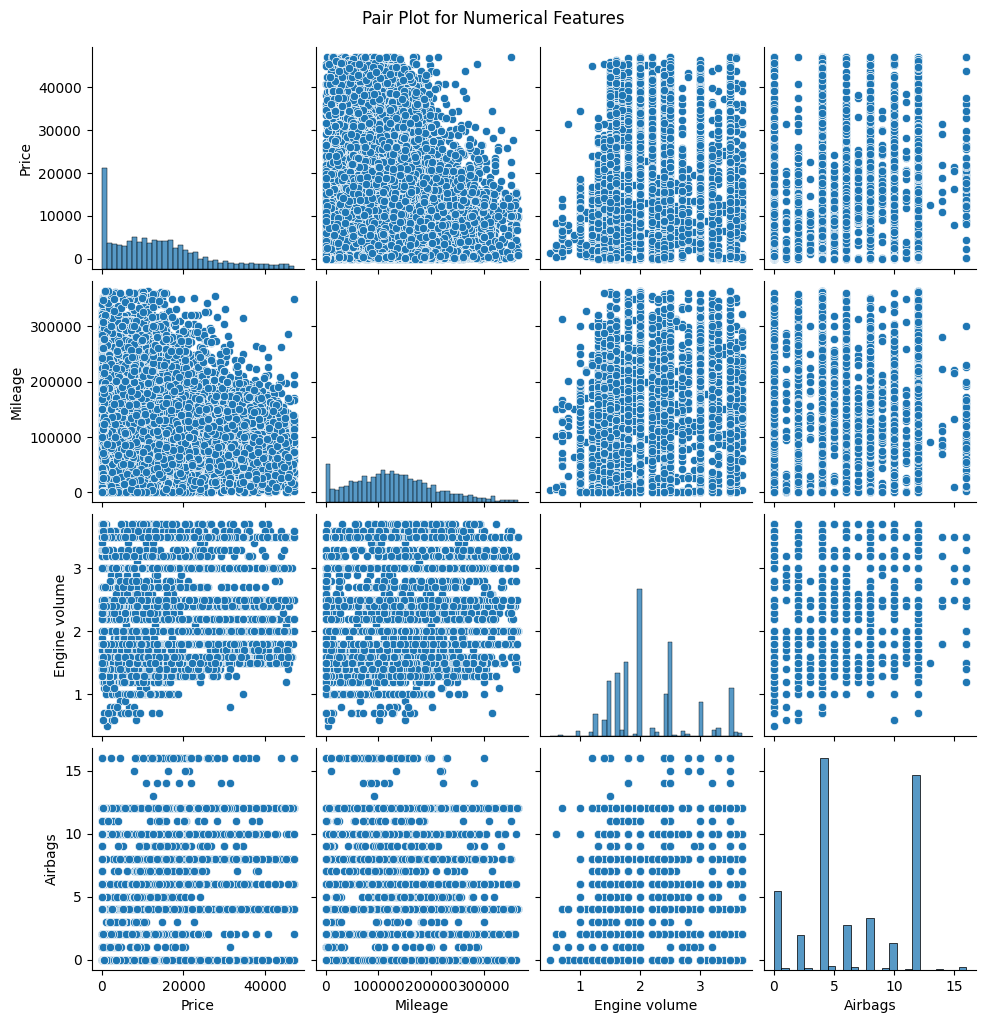

In [10]:
# Include only numerical columns for pair plot
numerical_df = df[['Price', 'Mileage', 'Engine volume', 'Airbags']]

sns.pairplot(numerical_df)
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()


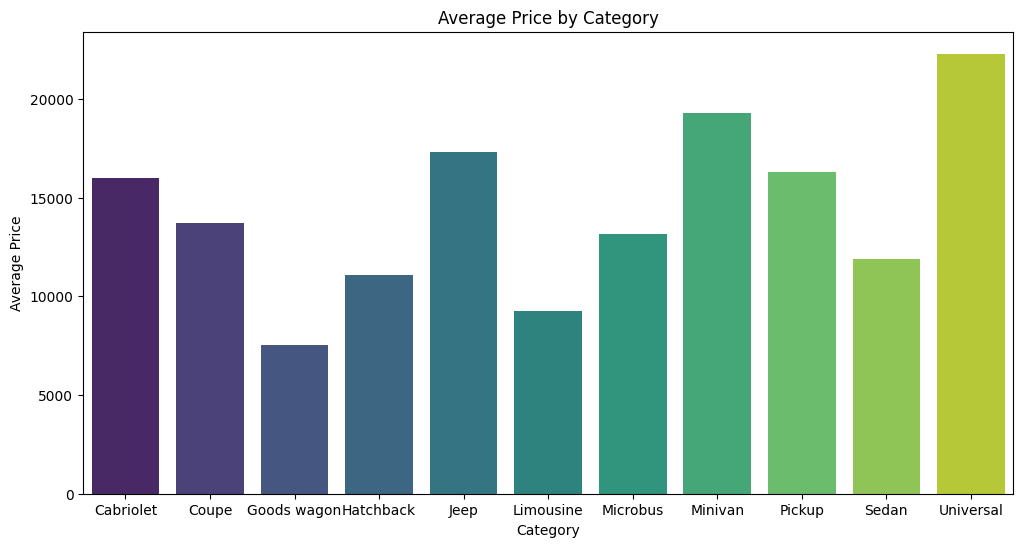

In [11]:
avg_price = df.groupby('Category')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price, x='Category', y='Price', palette='viridis')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()


In [12]:
import plotly.express as px

# Sample data with additional columns
data = {
    'Manufacturer': ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HONDA'],
    'Drive wheels': ['4x4', '4x4', 'Front', '4x4', 'Front'],
    'Count': [1, 1, 2, 1, 1]
}

df = pd.DataFrame(data)

# Create a chord diagram
fig = px.sunburst(df, path=['Manufacturer', 'Drive wheels'], values='Count', title='Chord Diagram for Drive Wheels vs. Manufacturer')
fig.show()


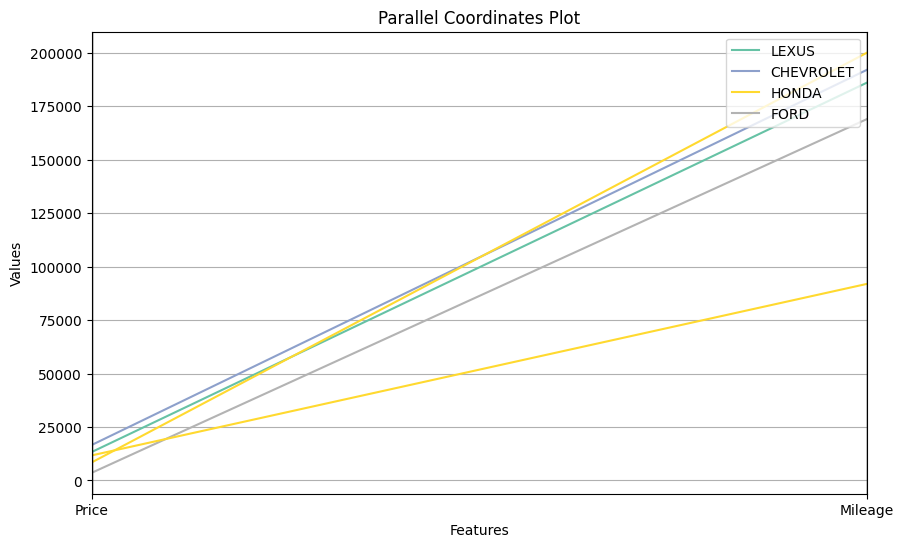

In [13]:
from pandas.plotting import parallel_coordinates

# Sample data with additional columns
data = {
    'Price': [13328, 16621, 8467, 3607, 11726],
    'Mileage': [186005, 192000, 200000, 168966, 91901],
    'Manufacturer': ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HONDA']
}

df = pd.DataFrame(data)

# Create a parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(df, 'Manufacturer', colormap='Set2')
plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()
